# **Get dataset from GitHub**

In [1]:
import requests

url = "https://raw.githubusercontent.com/siskasimandalahi/DestiGo/Machine-Learning/Dataset/data_destinasi_wisata.csv"
response = requests.get(url)
with open("data_destinasi_wisata.csv", "wb") as file:
    file.write(response.content)

In [2]:
# install the required library
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install scikit-learn
!pip install nltk
!pip install matplotlib

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Roro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading indonesian: Package 'indonesian' not found
[nltk_data]     in index


False

### **Import the required Library**

In [4]:
# for preprocess data
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import save_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# visualization
import matplotlib.pyplot as plt

In [5]:
import sklearn
import tensorflow as tf
import matplotlib

# check version
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
print(nltk.__version__)
print(tf.__version__)
print(matplotlib.__version__)

1.23.5
2.0.2
1.2.2
3.8.1
2.12.0
3.7.1


### Data Understanding
this is section that read the data that we get from github. File name is 'data_destinasi_wisata'

In [6]:
# read the data
destinations = pd.read_csv('data_destinasi_wisata.csv')
destinations.sample(5)

,id,nama_tempat,kategori,kota,alamat,deskripsi,lat,long
433,434,Sego Sambel Mak Yeye,Kuliner,Surabaya,"Jl. Jagir Wonokromo Wetan No.10, Jagir, Kec. W...",Mak Yeye adalah penyetan legendaris yang ada s...,-7.301319,112.735462
385,386,Museum De Javasche Bank,Budaya,Surabaya,"Jl. Garuda No.1, Krembangan Sel., Kec. Kremban...",Museum Bank Indonesia (Bahasa Indonesia: Museu...,-7.235378,112.736765
429,430,Rujak CIngur dan Sop Buntut Genteng Durasim,Kuliner,Surabaya,"Jl. Genteng Durasim No.29, RT.001/RW.05, Gente...",Rumah makan simpel yang sudah lama berdiri den...,-7.257715,112.737973
425,426,Nasi Pecel Bu Djoyo,Kuliner,Surabaya,"Jl. Pandegiling No.318A, Wonorejo, Kec. Tegals...",Sebuah warung makan simpel yang menyajikan hid...,-7.274493,112.729612
383,384,Monumen Perjuangan Polisi Republik Indonesia,Budaya,Surabaya,"PP9R+M9F, Jl. Polisi Istimewa, Keputran, Kec. ...",Monumen yang letaknya tidak jauh dari gedung W...,-7.280810,112.740926


In [7]:
print(f"Number of places in the datasets : {len(destinations.id.unique())}")

Number of places in the datasets : 515


### Exploratory Data Analysis
In this section, we analysis the data that we get which checks whether there are null data and drop data that are not used for processing

In [8]:
# check info of dataset such as how many column and what is the type
destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           515 non-null    int64  
 1   nama_tempat  515 non-null    object 
 2   kategori     515 non-null    object 
 3   kota         515 non-null    object 
 4   alamat       515 non-null    object 
 5   deskripsi    514 non-null    object 
 6   lat          515 non-null    float64
 7   long         515 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 32.3+ KB


In [9]:
# check if there is null
destinations.isnull().sum()

id             0
nama_tempat    0
kategori       0
kota           0
alamat         0
deskripsi      1
lat            0
long           0
dtype: int64

In [10]:
# drop the null data
destinations = destinations.dropna(subset=['deskripsi'])

# check again that null in 'deskripsi' is drop
destinations.isnull().sum()

id             0
nama_tempat    0
kategori       0
kota           0
alamat         0
deskripsi      0
lat            0
long           0
dtype: int64

In [11]:
# check if there is missing value
destinations.isna().sum()

id             0
nama_tempat    0
kategori       0
kota           0
alamat         0
deskripsi      0
lat            0
long           0
dtype: int64

In [12]:
# check the data unique of column 'kategori' and 'kota
print(destinations.kategori.unique())
print(destinations.kota.unique())

['Taman Hiburan' 'Budaya' 'Alam' 'Tempat Ibadah' 'Kuliner' 'Bahari'
 'Pusat Perbelanjaan']
['Bandung' 'Jakarta' 'Jakarta Utara' 'Jakarta Barat' 'Jakarta Pusat'
 'Jakarta Selatan' 'Jakarta Timur' 'Surabaya']


In [13]:
# check info again
destinations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 514
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           514 non-null    int64  
 1   nama_tempat  514 non-null    object 
 2   kategori     514 non-null    object 
 3   kota         514 non-null    object 
 4   alamat       514 non-null    object 
 5   deskripsi    514 non-null    object 
 6   lat          514 non-null    float64
 7   long         514 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ KB


In [14]:
# see an overview of the data
destinations.head()

,id,nama_tempat,kategori,kota,alamat,deskripsi,lat,long
0,1,Trans Studio Bandung,Taman Hiburan,Bandung,"Jl. Gatot Subroto No.289A, Cibangkong, Kec. Ba...",Trans Studio Bandung adalah sebuah kompleks ta...,-6.925094,107.636494
1,2,Farm House Susu Lembang,Taman Hiburan,Bandung,"Jl. Raya Lembang No.108, Gudangkahuripan, Kec....",Farm House Susu Lembang adalah destinasi yang ...,-6.832969,107.605618
2,3,Dusun Bambu,Taman Hiburan,Bandung,"Jl. Kolonel Masturi No.KM. 11, Kertawangi, Kec...",Dusun Bambu adalah destinasi wisata yang menaw...,-6.789715,107.579163
3,4,Kebun Binatang Bandung,Taman Hiburan,Bandung,"Jl. Kebun Binatang No.6, Lb. Siliwangi, Kecama...","Kebun Binatang Bandung, juga dikenal sebagai K...",-6.889718,107.607728
4,5,Dago Dreampark,Taman Hiburan,Bandung,"Jl. Dago Giri No.Km. 2.2, Pagerwangi, Kec. Lem...",Dago Dreampark adalah kompleks rekreasi yang t...,-6.848642,107.625939


### Data Preprocessing
preprocess data may involves encoding value of features and labels, change encode to numeric. Also, process column 'deskripsi' that have a lot of word that must be cleaning and tokenizing. Use a tokenizer to convert description text into numeric vectors.

In [15]:
# Preprocessing data
def clean_text(text):
    # Cleaning up special characters using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [16]:
# Cleaning data kota
destinations['clean_kota'] = destinations['kota'].apply(clean_text)

# Cleaning data kategori
destinations['clean_kategori'] = destinations['kategori'].apply(clean_text)

In [17]:
# Preprocessing text deskripsi
def clean_deskripsi(text):
    # Cleaning up special characters using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Changing to lowercase
    text = text.lower()
    # Removing stop words using NLTK
    stop_words = set(stopwords.words('indonesian'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    return text

In [18]:
# Cleaning text deskripsi
destinations['clean_deskripsi'] = destinations['deskripsi'].apply(clean_deskripsi)

### trying Augmented Text

In [19]:
from nltk.corpus import wordnet
import random
nltk.download('wordnet')

# Function to get synonyms of a word using WordNet
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to perform synonym replacement on a sentence
def synonym_replacement(sentence, n=1):
    tokens = nltk.word_tokenize(sentence)
    augmented_sentences = []

    for _ in range(n):
        augmented_tokens = []
        for token in tokens:
            synonyms = get_synonyms(token)
            if synonyms:
                synonym = random.choice(synonyms)
                augmented_tokens.append(synonym)
            else:
                augmented_tokens.append(token)
        
        augmented_sentence = " ".join(augmented_tokens)
        augmented_sentences.append(augmented_sentence)
    
    return augmented_sentences

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Roro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# Augment the text in the DataFrame
destinations['augmented_text'] = destinations['clean_deskripsi'].apply(lambda x: synonym_replacement(x, n=3))

In [21]:
# Join the values in 'cleaned' column into sentences
sentences = []
for words in destinations['augmented_text']:
    sentence = ' '.join(words)
    sentences.append(sentence)

In [22]:
destinations['new_aug'] = sentences
destinations.head()

,id,nama_tempat,kategori,kota,alamat,deskripsi,lat,long,clean_kota,clean_kategori,clean_deskripsi,augmented_text,new_aug
0,1,Trans Studio Bandung,Taman Hiburan,Bandung,"Jl. Gatot Subroto No.289A, Cibangkong, Kec. Ba...",Trans Studio Bandung adalah sebuah kompleks ta...,-6.925094,107.636494,Bandung,Taman Hiburan,trans studio bandung kompleks taman hiburan me...,[trans studio Bandung kompleks taman hiburan m...,trans studio Bandung kompleks taman hiburan me...
1,2,Farm House Susu Lembang,Taman Hiburan,Bandung,"Jl. Raya Lembang No.108, Gudangkahuripan, Kec....",Farm House Susu Lembang adalah destinasi yang ...,-6.832969,107.605618,Bandung,Taman Hiburan,farm house susu lembang destinasi menawarkan p...,[farm house susu lembang destinasi menawarkan ...,farm house susu lembang destinasi menawarkan p...
2,3,Dusun Bambu,Taman Hiburan,Bandung,"Jl. Kolonel Masturi No.KM. 11, Kertawangi, Kec...",Dusun Bambu adalah destinasi wisata yang menaw...,-6.789715,107.579163,Bandung,Taman Hiburan,dusun bambu destinasi wisata menawarkan pengal...,[dusun bambu destinasi wisata menawarkan penga...,dusun bambu destinasi wisata menawarkan pengal...
3,4,Kebun Binatang Bandung,Taman Hiburan,Bandung,"Jl. Kebun Binatang No.6, Lb. Siliwangi, Kecama...","Kebun Binatang Bandung, juga dikenal sebagai K...",-6.889718,107.607728,Bandung,Taman Hiburan,kebun binatang bandung dikenal kebun binatang ...,[kebun binatang Bandung dikenal kebun binatang...,kebun binatang Bandung dikenal kebun binatang ...
4,5,Dago Dreampark,Taman Hiburan,Bandung,"Jl. Dago Giri No.Km. 2.2, Pagerwangi, Kec. Lem...",Dago Dreampark adalah kompleks rekreasi yang t...,-6.848642,107.625939,Bandung,Taman Hiburan,dago dreampark kompleks rekreasi terletak dago...,[greaseball dreampark kompleks rekreasi terlet...,greaseball dreampark kompleks rekreasi terleta...


In [23]:
# Combined three column
combined_text = destinations['clean_kota'] + ' ' + destinations['clean_kategori'] + ' ' + destinations['new_aug']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_text)
text_sequences = tokenizer.texts_to_sequences(combined_text)
max_sequence_length = max([len(seq) for seq in text_sequences])
padded_sequences = pad_sequences(text_sequences, maxlen=max_sequence_length)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(destinations['nama_tempat'])

In [24]:
max_sequence_length

607

### Training Model
- split dataset into training and testing data use this 80%-20%
- Train the model using the training data

In [25]:
# Division of data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [26]:
# Building deep learning model with embedding and LSTM
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=16))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 607, 100)          667400    
                                                                 
 lstm (LSTM)                 (None, 16)                7488      
                                                                 
 dense (Dense)               (None, 514)               8738      
                                                                 
Total params: 683,626
Trainable params: 683,626
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Training model with early stopping
#early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
#                   batch_size=32, epochs=20, callbacks=[early_stopping])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=32, epochs=100)

Epoch 1/100
13/13 [==============================] - 8s 380ms/step - loss: 6.2446 - accuracy: 0.0000e+00 - val_loss: 6.2498 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 4s 304ms/step - loss: 6.2328 - accuracy: 0.0706 - val_loss: 6.2618 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 4s 316ms/step - loss: 6.2209 - accuracy: 0.1144 - val_loss: 6.2785 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 5s 353ms/step - loss: 6.1975 - accuracy: 0.0876 - val_loss: 6.3461 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 4s 320ms/step - loss: 6.1529 - accuracy: 0.0292 - val_loss: 6.3894 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 5s 355ms/step - loss: 6.0898 - accuracy: 0.0754 - val_loss: 6.6862 - val_accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 3s 265ms/step - loss: 6.0175 - accuracy: 0.0584 - val_loss: 6

In [29]:
# Display accuracy and loss
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

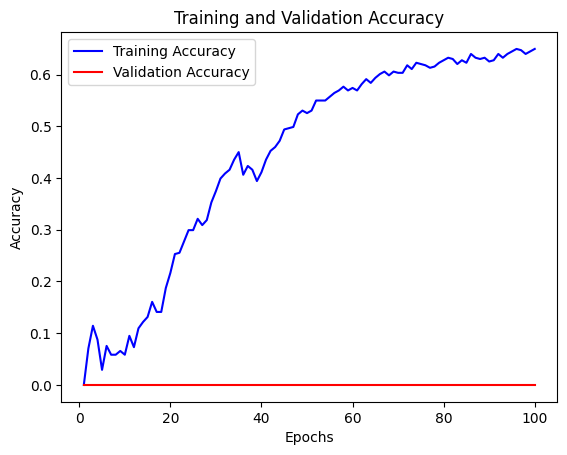

In [30]:
# Plotting Accuracy
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

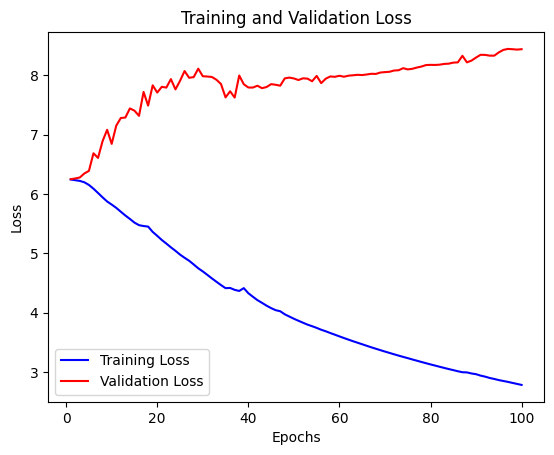

In [31]:
# Plotting loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predict the model

Make Recommendation System

In [32]:
# Recomendation Function
def recommend_places(input_text, top_n=5):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length)
    predictions = model.predict(input_sequence)
    top_indices = np.argsort(predictions.squeeze())[:-top_n-1:-1]
    recommended_labels = label_encoder.inverse_transform(top_indices)
    recommendations = destinations[destinations['nama_tempat'].isin(recommended_labels)]
    return recommendations

In [33]:
# Recommendation function usage example
input_text = "Museum"
recommended_places = recommend_places(input_text)

# Display recommendation results
print(recommended_places[['nama_tempat', 'kota', 'kategori', 'alamat', 'lat', 'long', 'deskripsi']])

1/1 [==============================] - 0s 495ms/step
                               nama_tempat           kota       kategori  \
61                             Jalan Braga        Bandung         Budaya   
302               Sate Maranggi Padjajaran  Jakarta Timur        Kuliner   
316             Midori Japanese Restaurant  Jakarta Utara        Kuliner   
419  Kayu Contemporary Japanese Restaurant       Surabaya        Kuliner   
511                 Klenteng Sanggar Agung       Surabaya  Tempat Ibadah   

                                                alamat       lat        long  \
61       Jl. Braga, Braga, Sumur Bandung, Kota Bandung -6.915053  107.608984   
302  Jl. RA. Fadillah, RT.3/RW.6, Cijantung, Kec. P... -6.330715  106.845542   
316  Gading Bukit Indah, Jl. Raya Gading Kirana No.... -6.149312  106.898688   
419  Srijaya, Jl. Mayjen Sungkono No.212-214, Putat... -7.287287  112.706545   
511  Jl. Sukolilo No.100, Sukolilo Baru, Kec. Bulak... -7.246944  112.802222   

         

## Deployment
output the h5 model

In [34]:
#Save the trained model as a Keras HDF5 file. 

saved_model_path = "./model_recommendation.h5"
model.save(saved_model_path)

In [35]:
import joblib

# Menyimpan label_encoder ke dalam file
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [36]:
#from google.colab import files
# Download the model file
# files.download('model_recommendation_v2.h5')

## Try Load model

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.preprocessing.text import Tokenizer

# Load the model from GCP storage
#model_path = 'gs://your-bucket/model_recommendation_v2.h5'
model = tf.keras.models.load_model('model_recommendation.h5')

# Memuat label_encoder dari file terpisah
label_encoder = joblib.load('label_encoder.pkl')

# define Tokenizer
tokenizer = Tokenizer()

# Load destinations data
#destinations_path = 'gs://your-bucket/data_destinasi_wisata.csv'
destinations = pd.read_csv('data_destinasi_wisata.csv')

# Set max_sequence_length based on the model architecture
max_sequence_length = 607  # Set the maximum sequence length used in the model

# Function for content-based recommendation
def recommend(input_text):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    input_sequence = tf.keras.preprocessing.sequence.pad_sequences(input_sequence, maxlen=max_sequence_length)
    predictions = model.predict(input_sequence)
    top_indices = np.argsort(predictions.squeeze())[::-1][:5]
    recommended_labels = label_encoder.inverse_transform(top_indices)
    recommendations = destinations[destinations['nama_tempat'].isin(recommended_labels)]
    return recommendations[['nama_tempat', 'kota', 'kategori', 'alamat', 'lat', 'long', 'deskripsi']]

# Example usage
input_text = "Monumen Tugu Pahlawan"
recommended_places = recommend(input_text)

# Display recommendation results
print(recommended_places)

1/1 [==============================] - 0s 364ms/step
                     nama_tempat           kota            kategori  \
25                 Taman Begonia        Bandung       Taman Hiburan   
302     Sate Maranggi Padjajaran  Jakarta Timur             Kuliner   
316   Midori Japanese Restaurant  Jakarta Utara             Kuliner   
478  Lagoon Avenue Mall Sungkono       Surabaya  Pusat Perbelanjaan   
511       Klenteng Sanggar Agung       Surabaya       Tempat Ibadah   

                                                alamat       lat        long  \
25   Jl. Maribaya No.120 A, Langensari, Kec. Lemban... -6.826016  107.638356   
302  Jl. RA. Fadillah, RT.3/RW.6, Cijantung, Kec. P... -6.330715  106.845542   
316  Gading Bukit Indah, Jl. Raya Gading Kirana No.... -6.149312  106.898688   
478  Blok RA No. Kav 9-10, Jl. KH Abdul Wahab Siami... -7.289673  112.706674   
511  Jl. Sukolilo No.100, Sukolilo Baru, Kec. Bulak... -7.246944  112.802222   

                                       